[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


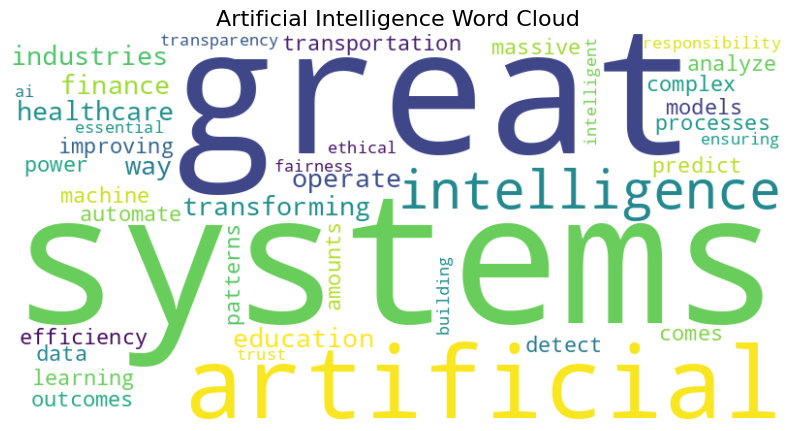


Top Central Words in the Text:
Word            Degree       Betweenness     Eigenvector    
------------------------------------------------------------
systems         0.15         0.401           0.004          
great           0.15         0.136           0.574          
transforming    0.1          0.044           0.0            
way             0.1          0.054           0.0            
industries      0.1          0.097           0.0            
operate         0.1          0.088           0.0            
healthcare      0.1          0.15            0.001          
education       0.1          0.111           0.001          
finance         0.1          0.206           0.002          
transportation  0.1          0.12            0.002          


In [ ]:
# Step 1: Install Required Libraries
# pip install nltk matplotlib wordcloud networkx

# Step 2: Import Required Libraries
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
from itertools import combinations

# Step 3: Download NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')

# Step 4: Prepare Input Text
text = """
Artificial Intelligence is transforming the way industries operate.
From healthcare and education to finance and transportation, AI-powered systems are improving efficiency and decision-making.
Machine learning models analyze massive amounts of data to predict outcomes, detect patterns, and automate complex processes.
However, with great power comes great responsibility — ensuring ethical AI, transparency, and fairness is essential for building trust in intelligent systems.
"""

# Step 5: Preprocess the Text
tokens = word_tokenize(text.lower())
filtered = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

# Step 6: Generate and Visualize Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Artificial Intelligence Word Cloud", fontsize=16)
plt.show()

# Step 7: Identify Central Words (Using Network Centrality)
# Build a co-occurrence network
G = nx.Graph()
window_size = 3  # defines how close words should be to connect

for i in range(len(filtered) - window_size + 1):
    window_words = filtered[i:i + window_size]
    for w1, w2 in combinations(window_words, 2):
        if G.has_edge(w1, w2):
            G[w1][w2]['weight'] += 1
        else:
            G.add_edge(w1, w2, weight=1)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')

# Combine centralities into a summary
central_summary = []
for word in degree_centrality:
    central_summary.append({
        'word': word,
        'degree': round(degree_centrality[word], 3),
        'betweenness': round(betweenness_centrality[word], 3),
        'eigenvector': round(eigenvector_centrality[word], 3)
    })

# Sort by degree centrality
central_summary = sorted(central_summary, key=lambda x: x['degree'], reverse=True)

# Display Top Central Words
print("\nTop Central Words in the Text:")
print("{:<15} {:<12} {:<15} {:<15}".format('Word', 'Degree', 'Betweenness', 'Eigenvector'))
print("-" * 60)
for item in central_summary[:10]:
    print("{:<15} {:<12} {:<15} {:<15}".format(
        item['word'], item['degree'], item['betweenness'], item['eigenvector']
    ))
